In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy.stats import ttest_ind


In [10]:
# Loading  dataset and checking head()
data = pd.read_csv('marketing_data.csv')
print(data.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [11]:
# checking datatypes
print(data.dtypes)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object


In [12]:
data = data.rename(columns={' Income ': 'Income'})
print(data.dtypes)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object


In [18]:
# Income missing values imputaion 

missing_income = data[data['Income'].isnull()]
print(missing_income)


         ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married    NaN        2         1   
262    1994        1983  Graduation        Married    NaN        1         0   
394    3769        1972         PhD       Together    NaN        1         0   
449    5255        1986  Graduation         Single    NaN        1         0   
525    8268        1961         PhD        Married    NaN        0         1   
590   10629        1973    2n Cycle        Married    NaN        1         0   
899   10475        1970      Master       Together    NaN        0         1   
997    9235        1957  Graduation         Single    NaN        1         1   
1096   4345        1964    2n Cycle         Single    NaN        1         1   
1185   7187        1969      Master       Together    NaN        1         1   
1213   8720        1978    2n Cycle       Together    NaN        0         0   
1312   8557        1982  Graduation     

In [19]:
# Check the unique values in the 'Education' column
education_values = data['Education'].unique()
print("Education values:", education_values)



Education values: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [20]:
# Check the unique values in the 'Marital_Status' column
marital_status_values = data['Marital_Status'].unique()
print("Marital Status values:", marital_status_values)


Marital Status values: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


Cleaned Education values: ['Graduation' 'PhD' 'Master' 'Basic']
Cleaned Marital Status values: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Unknown']


In [23]:

# Remove formatting characters ('$' and ',') and convert 'Income' to numeric
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

# Group the data by 'Education' and 'Marital_Status', and calculate the average income
avg_income = data.groupby(['Education', 'Marital_Status'])['Income'].mean()

# Function to impute missing income values
def impute_income(row):
    if pd.isnull(row['Income']):
        education = row['Education']
        marital_status = row['Marital_Status']
        avg_income_value = avg_income[education, marital_status]
        return avg_income_value
    else:
        return row['Income']

# Apply the function to impute missing income values
data['Income'] = data.apply(impute_income, axis=1)

# Check if there are any remaining missing values
print(data['Income'].isnull().sum())


0


In [24]:
import datetime

# Calculate total number of children
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']

# Calculate age
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Calculate total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalSpending'] = data[spending_columns].sum(axis=1)

# Calculate total purchases
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data['TotalPurchases'] = data[purchase_columns].sum(axis=1)

# Check the updated dataset
print(data[['TotalChildren', 'Age', 'TotalSpending', 'TotalPurchases']].head())


   TotalChildren  Age  TotalSpending  TotalPurchases
0              0   54           1190              14
1              0   63            577              17
2              1   66            251              10
3              2   57             11               3
4              1   35             91               6


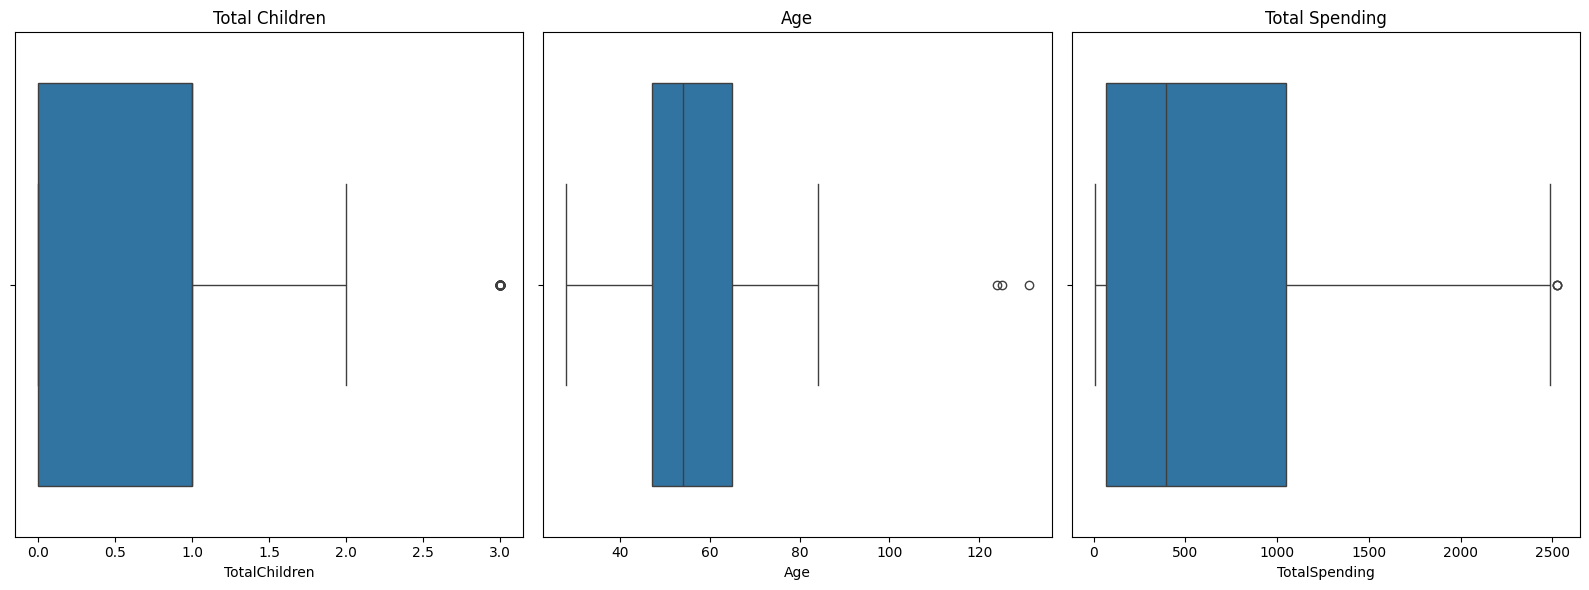

In [32]:
# Create box plots
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=data['TotalChildren'])
plt.title('Total Children')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['Age'])
plt.title('Age')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['TotalSpending'])
plt.title('Total Spending')

plt.tight_layout()
plt.show()


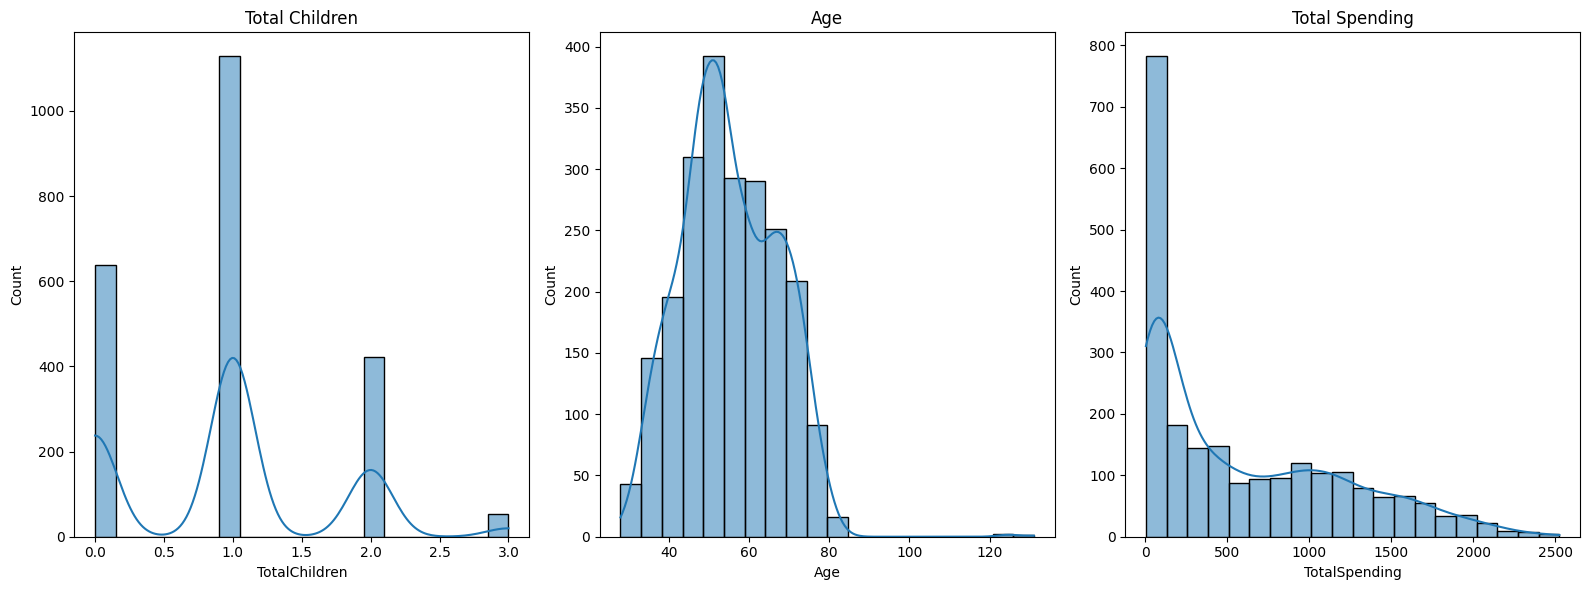

In [33]:
# Create histograms
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['TotalChildren'], bins=20, kde=True)
plt.title('Total Children')

plt.subplot(1, 3, 2)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age')

plt.subplot(1, 3, 3)
sns.histplot(data['TotalSpending'], bins=20, kde=True)
plt.title('Total Spending')

plt.tight_layout()
plt.show()

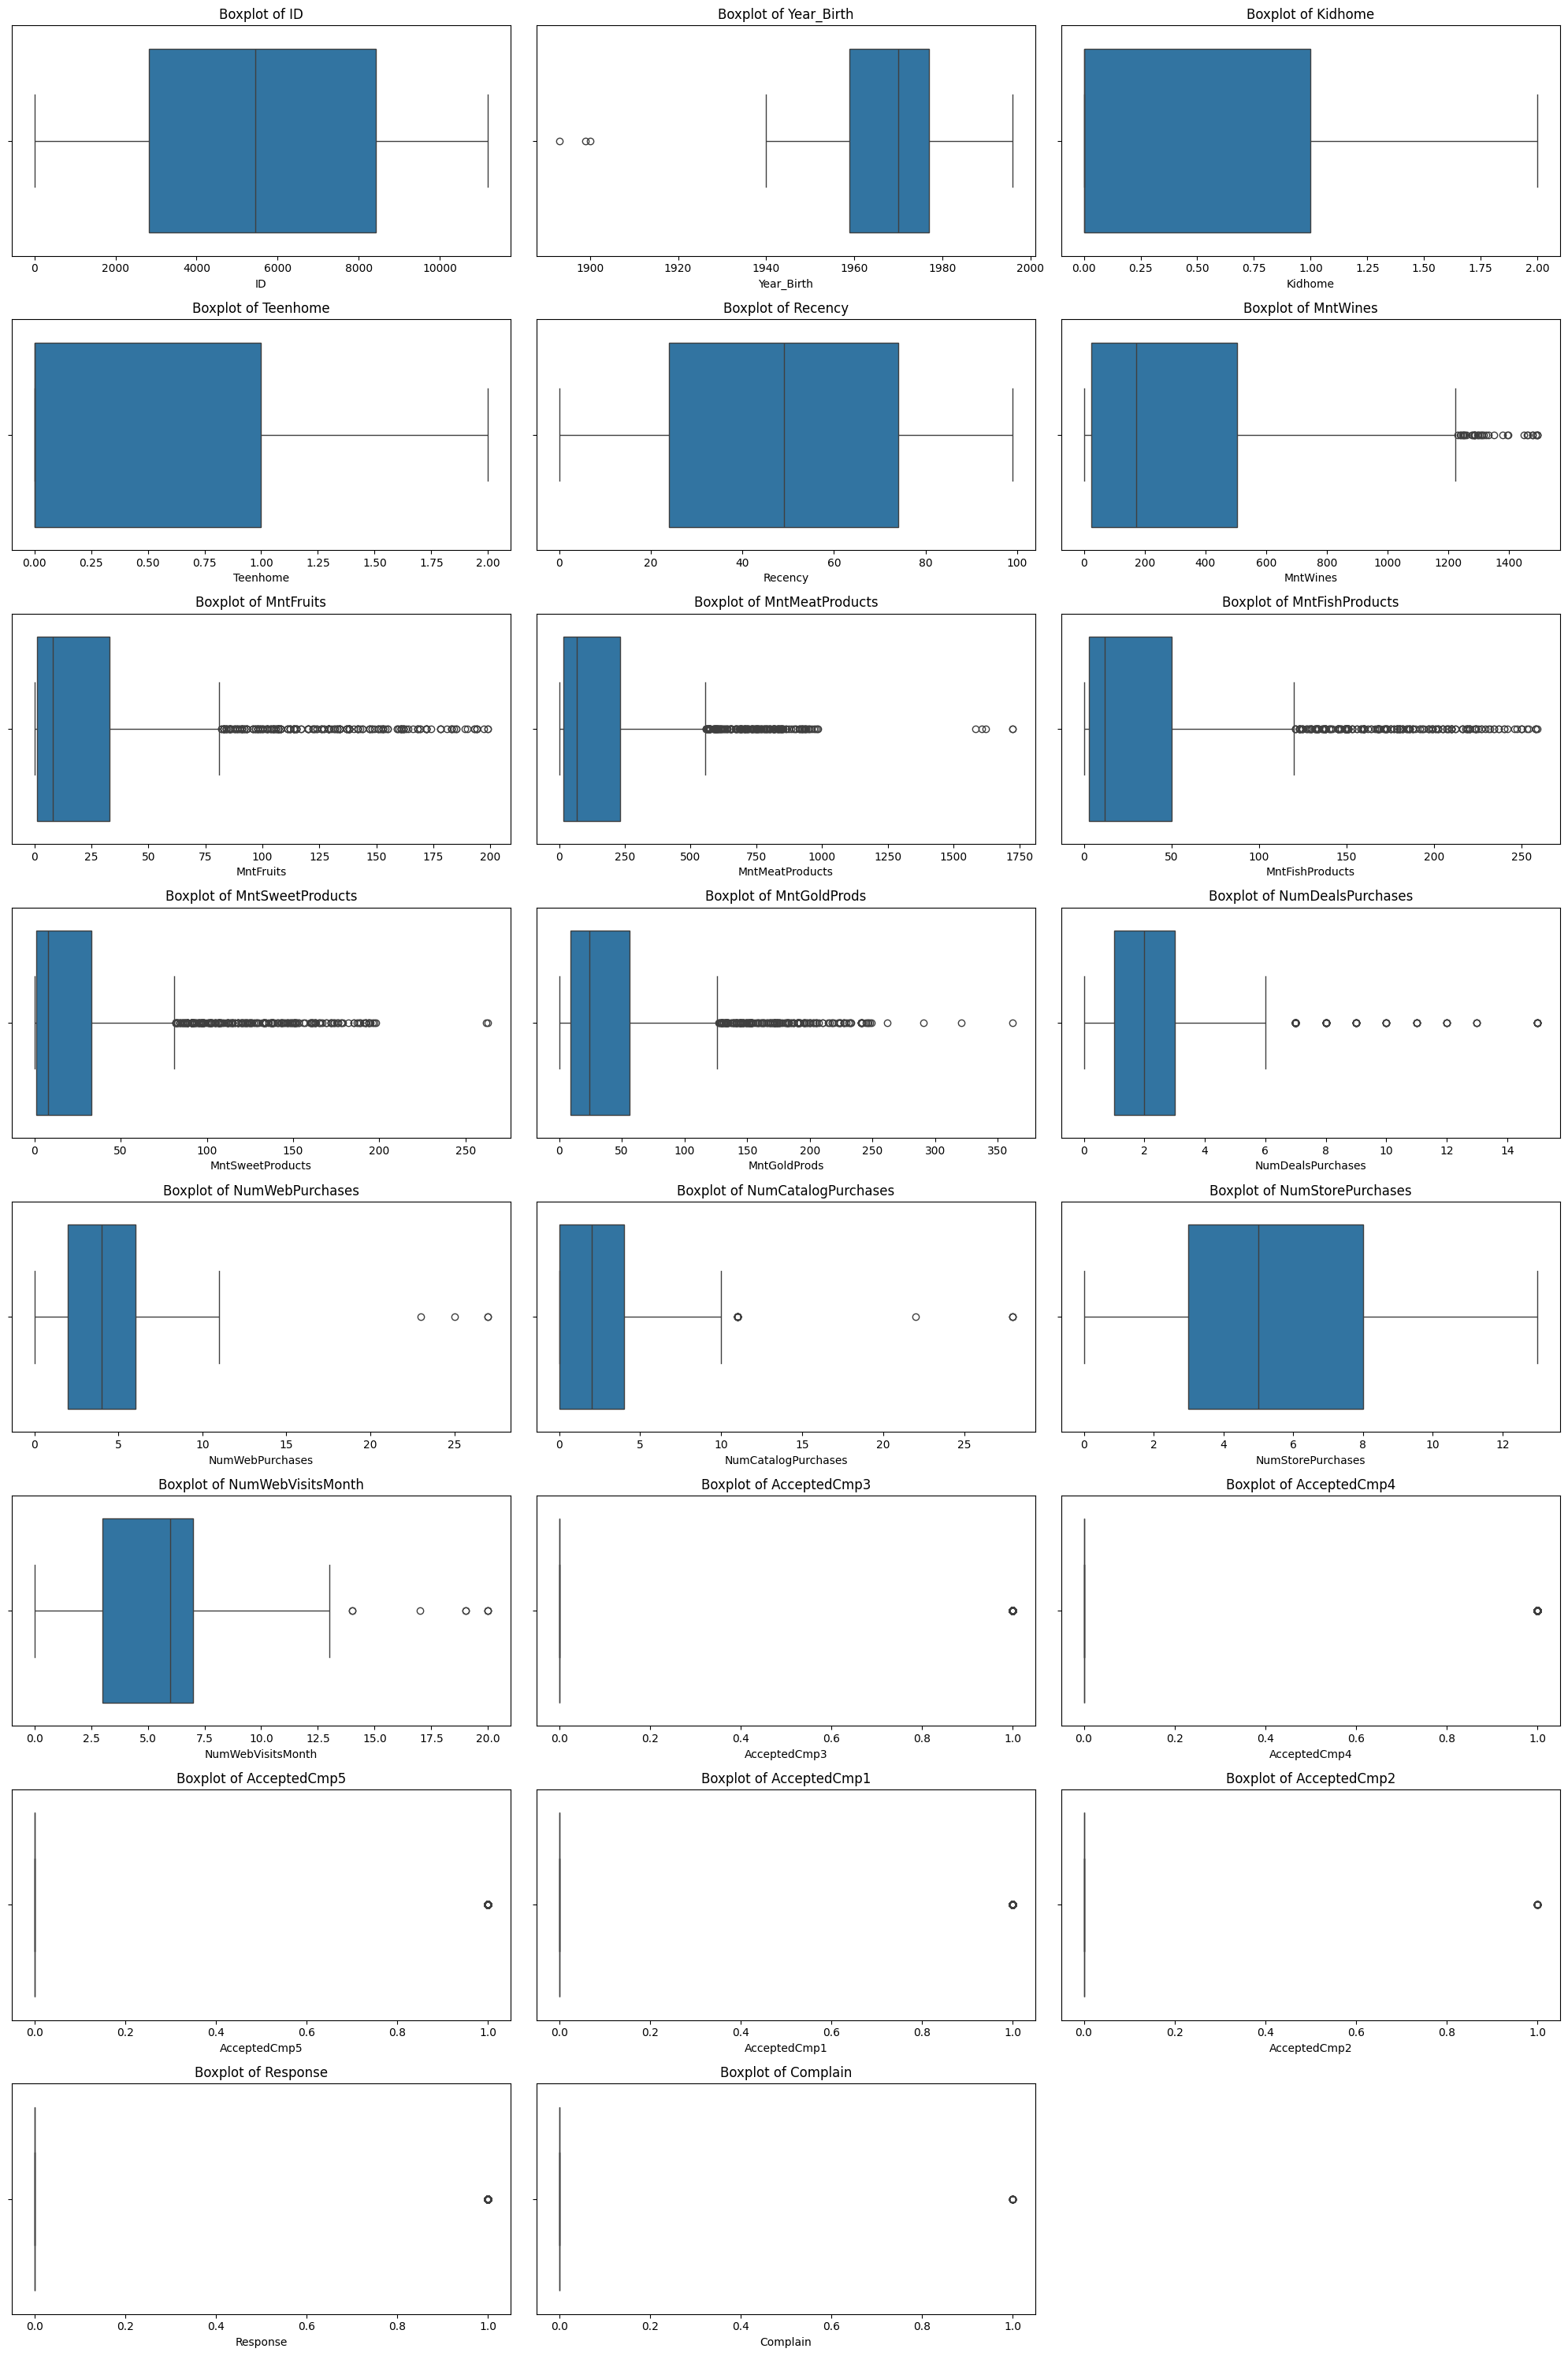

In [34]:
# Select numerical columns
numerical_columns = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 
                      'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']

# Create box plots for each numerical column
plt.figure(figsize=(20, 30))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(8, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


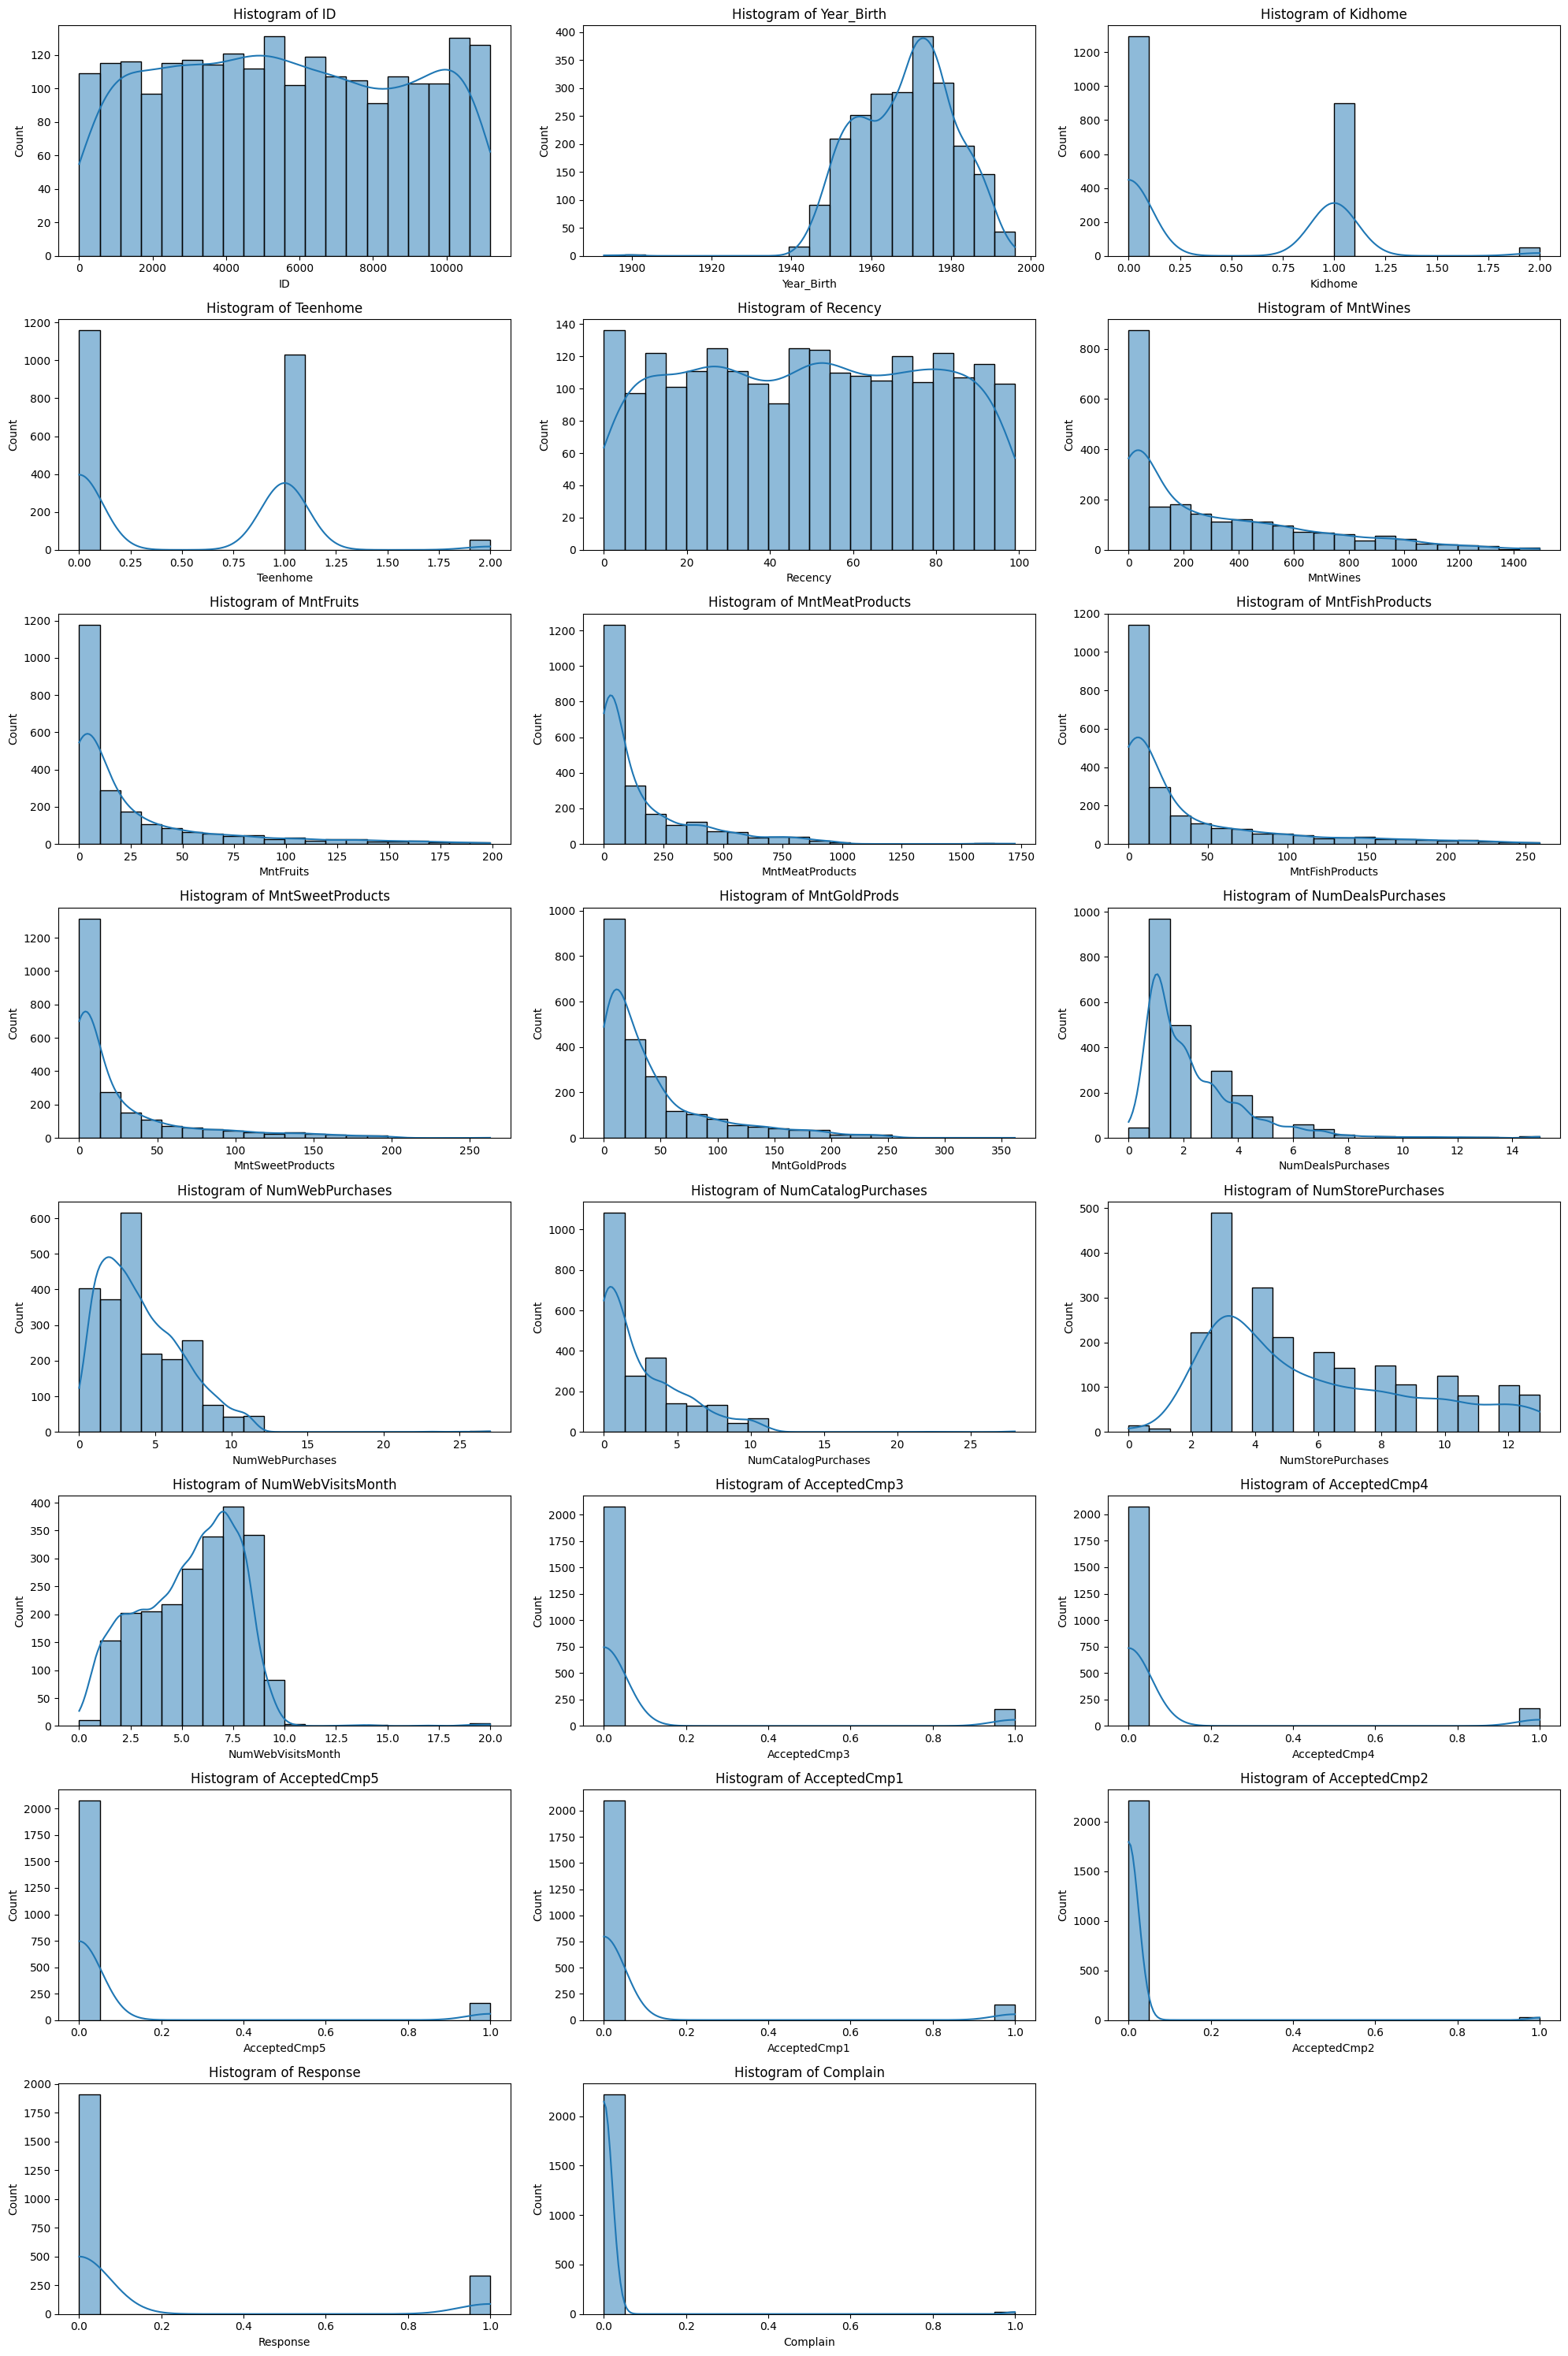

In [35]:
# Create histograms for each numerical column
plt.figure(figsize=(20, 30))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(8, 3, i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [44]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Create a copy of the original data
encoded_data = data.copy()

# Ordinal encoding for 'Education' and 'Marital_Status'
# Perform ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[['Basic', 'Graduation', 'Master', 'PhD'],
                                              ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Unknown']])
encoded_data[['Education', 'Marital_Status']] = ordinal_encoder.fit_transform(data[['Education', 'Marital_Status']])

# One-hot encoding for 'Country'
onehot_encoder = OneHotEncoder(drop='first')
country_encoded = pd.DataFrame(onehot_encoder.fit_transform(data[['Country']]).toarray(), columns=onehot_encoder.get_feature_names_out(['Country']))
encoded_data = pd.concat([encoded_data, country_encoded], axis=1)

# # Drop the original categorical columns
encoded_data.drop(['Country', 'Dt_Customer'], axis=1, inplace=True)

# # Display the first few rows of the encoded data
print(encoded_data.head())


      ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970        1.0             0.0  84835.0        0         0   
1      1        1961        1.0             1.0  57091.0        0         0   
2  10476        1958        1.0             2.0  67267.0        0         1   
3   1386        1967        1.0             3.0  32474.0        1         1   
4   5371        1989        1.0             1.0  21474.0        1         0   

   Recency  MntWines  MntFruits  ...  Age  TotalSpending  TotalPurchases  \
0        0       189        104  ...   54           1190              14   
1        0       464          5  ...   63            577              17   
2        0       134         11  ...   66            251              10   
3        0        10          0  ...   57             11               3   
4        0         6         16  ...   35             91               6   

   Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  Cou

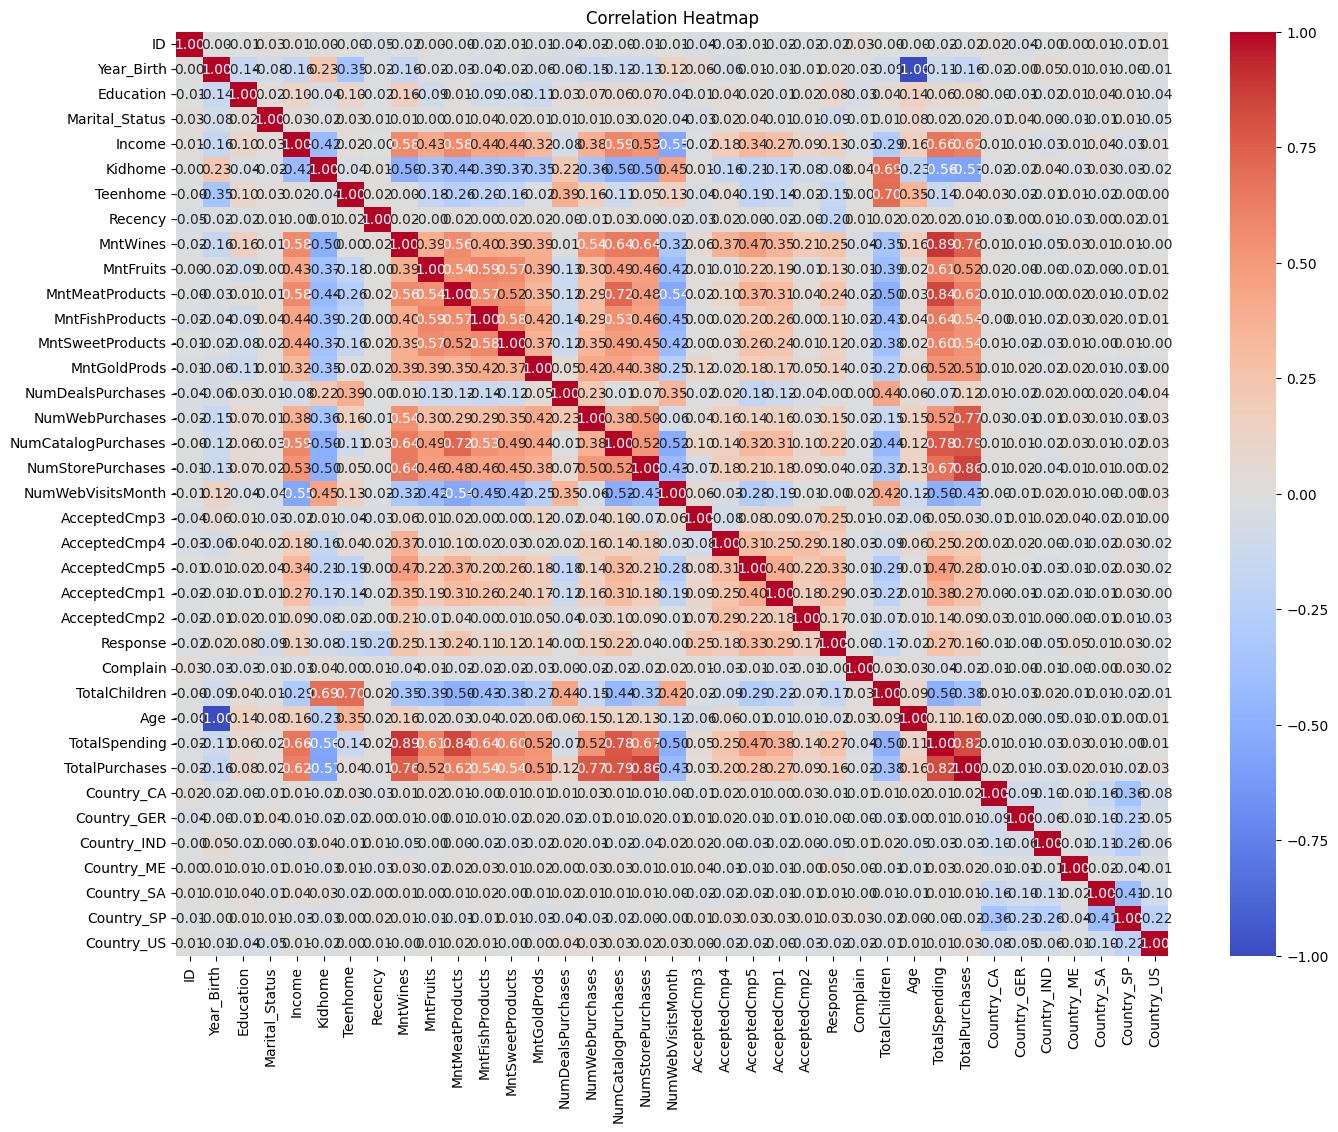

In [45]:
corr_matrix = encoded_data.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have a DataFrame called 'data' with columns 'Age', 'Kidhome', 'NumWebPurchases', 'NumStorePurchases', 'Country', and 'Income'

# Hypothesis 1: Older people prefer shopping in-store
age_instore = data[data['NumStorePurchases'] > 0]['Age']
age_online = data[data['NumWebPurchases'] > 0]['Age']
t_stat, p_value = ttest_ind(age_instore, age_online, equal_var=False)
print(f"Hypothesis 1: {'Accepted' if p_value >= 0.05 else 'Rejected'}")

# Hypothesis 2: Customers with kids prefer online shopping
kidhome_online = data[data['NumWebPurchases'] > 0]['Kidhome']
kidhome_instore = data[data['NumStorePurchases'] > 0]['Kidhome']
t_stat, p_value = ttest_ind(kidhome_instore, kidhome_online, equal_var=False)
print(f"Hypothesis 2: {'Accepted' if p_value >= 0.05 else 'Rejected'}")

# Hypothesis 3: Other distribution channels cannibalize store sales
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
corr_instore = data[data['NumStorePurchases'] > 0][channels].sum(axis=1)
corr_other = data[data['NumStorePurchases'] == 0][channels].sum(axis=1)
corr_coef = corr_instore.corr(corr_other)
print(f"Hypothesis 3: {'No Cannibalization' if corr_coef >= 0 else 'Cannibalization'}")




Hypothesis 1: Accepted
Hypothesis 2: Accepted
Hypothesis 3: Cannibalization


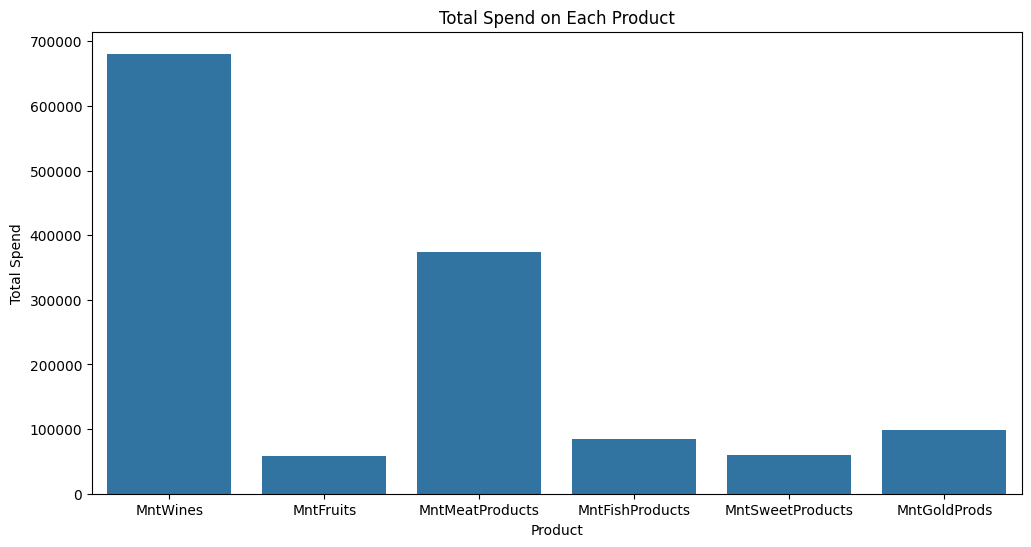

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns and calculate the sum for each product
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = data[products].sum()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=total_spent.index, y=total_spent.values)
plt.xlabel('Product')
plt.ylabel('Total Spend')
plt.title('Total Spend on Each Product')
plt.show()


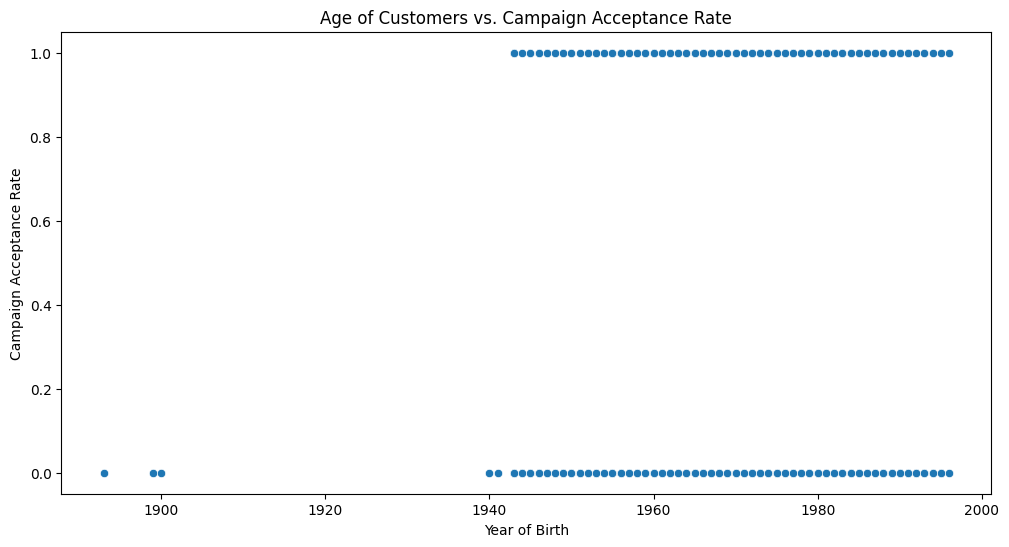

In [61]:
# Is there any pattern between the age of customers and the last campaign acceptance rate?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year_Birth', y='Response', data=data)
plt.xlabel('Year of Birth')
plt.ylabel('Campaign Acceptance Rate')
plt.title('Age of Customers vs. Campaign Acceptance Rate')
plt.show()
# NO I DONT SEE ANY PATTEN IN AGE 

C:\Users\prabh\AppData\Local\Temp\ipykernel_15188\3253824139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalCampaignAcceptances', data=campaign_acceptance_by_country, palette='viridis')


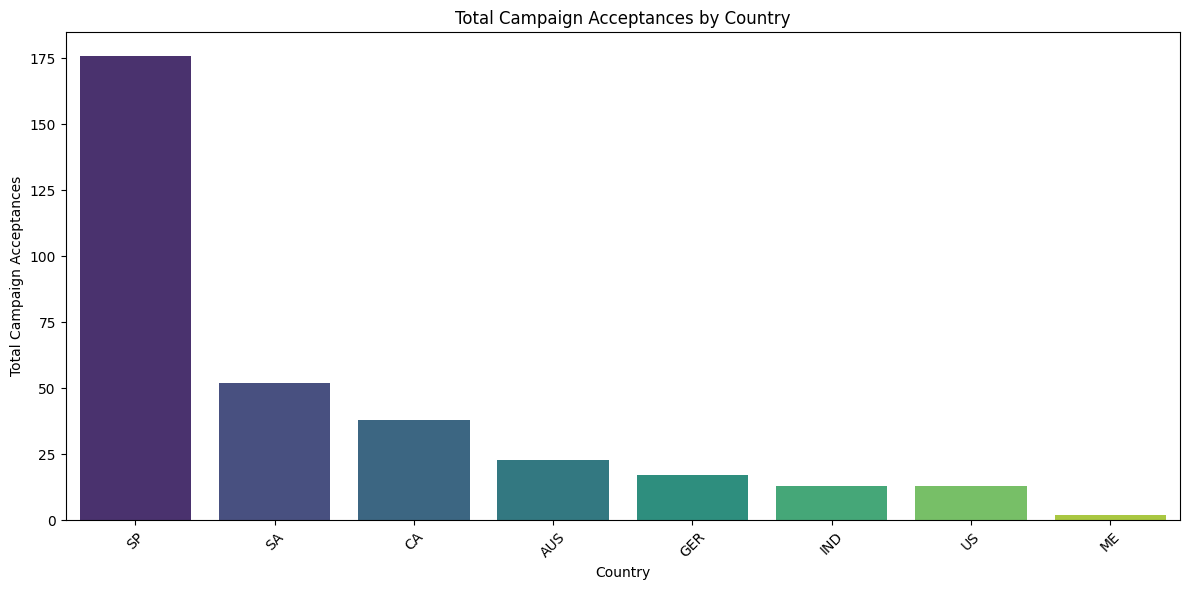

In [62]:
# Which Country has the greatest number of customers who accepted the last campaign?
# Group the data by country and calculate the total number of customers who accepted the last campaign in each country
campaign_acceptance_by_country = data[data['Response'] == 1].groupby('Country')['Response'].count().reset_index()
campaign_acceptance_by_country = campaign_acceptance_by_country.rename(columns={'Response': 'TotalCampaignAcceptances'})

# Sort the data by TotalCampaignAcceptances for better visualization
campaign_acceptance_by_country = campaign_acceptance_by_country.sort_values(by='TotalCampaignAcceptances', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalCampaignAcceptances', data=campaign_acceptance_by_country, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Campaign Acceptances')
plt.title('Total Campaign Acceptances by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
distinct_countries = data['Country'].unique()
print(distinct_countries)
# SP has the greatest number of customers who accepted the last campaign

['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


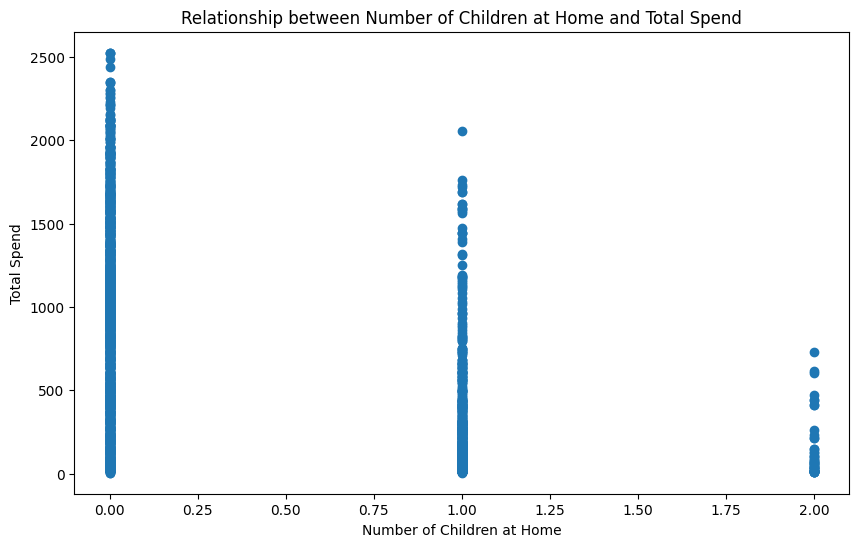

In [65]:
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(data['Kidhome'], data['Total_Spent'])
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spend')
plt.title('Relationship between Number of Children at Home and Total Spend')
plt.show()
# more the children less the spend

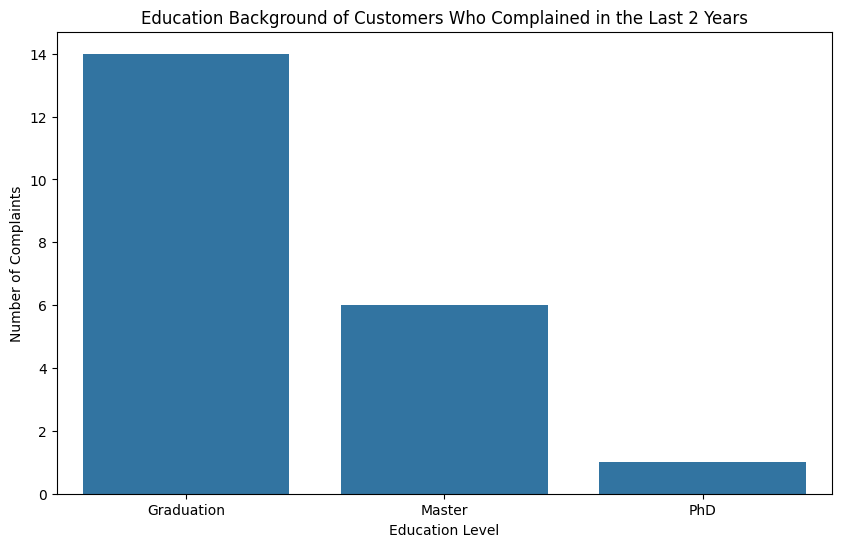

In [66]:
complained_customers = data[data['Complain'] == 1]
education_counts = complained_customers['Education'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.title('Education Background of Customers Who Complained in the Last 2 Years')
plt.show()
